# **Práctica 4: ACP y ACD**

Nombre:

Número de cuenta:

Email:

**Objetivo.** Realizar una selección de características a través de Análisis de Componentes Principales (ACP) y Análisis Correlacional de Datos (ACD).


**Fuente de datos:**

* ingresos: son ingresos mensuales de 1 o 2 personas, si están casados.
* gastos_comunes: son gastos mensuales de 1 o 2 personas, si están casados. 
* pago_coche
* gastos_otros
* ahorros
* vivienda: valor de la vivienda.
* estado_civil: 0-soltero, 1-casado, 2-divorciado
* hijos: cantidad de hijos menores (no trabajan).
* trabajo: 0-sin trabajo, 1-autonomo, 2-asalariado, 3-empresario, 4-autonomos, 5-asalariados, 6-autonomo y asalariado, 7-empresario y autonomo, 8-empresarios o empresario y autónomo 
* comprar: 0-alquilar, 1-comprar casa a través de crédito hipotecario con tasa fija a 30 años.


### **Importar las bibliotecas y los datos**

In [2]:
import pandas as pd                    # Para la manipulación y análisis de datos
import numpy as np                     # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt        # Para la generación de gráficas a partir de los datos
import seaborn as sns                  # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [3]:
Hipoteca = pd.read_csv("Datos/Hipoteca.csv")
Hipoteca

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


## **I. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

#### **Paso 1:** Hay evidencia de variables posiblemente correlacionadas.

In [4]:
CorrHipoteca = Hipoteca.corr(method='pearson')
CorrHipoteca

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000


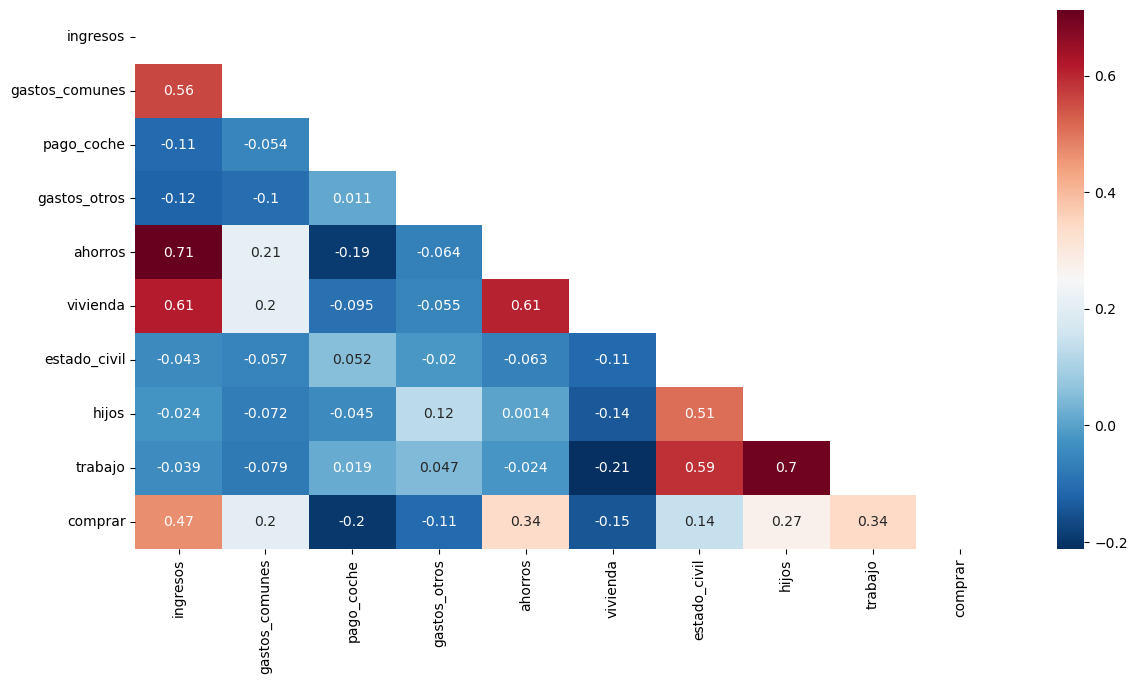

In [5]:
 # Se sugiere añadir este heatmap al proyecto.
MatrizInf = np.triu(CorrHipoteca)
sns.heatmap(CorrHipoteca, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

#### **Paso 2:** Se hace una estandarización de los datos.

In [6]:
from sklearn.decomposition import PCA #Probar también con normalización.
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                          # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = Estandarizar.fit_transform(Hipoteca)    # Se calculan la media y desviación para cada variable, y se escalan los datos

In [7]:
pd.DataFrame(MEstandarizada, columns=Hipoteca.columns)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,0.620129,0.104689,-1.698954,0.504359,0.649475,0.195910,-1.227088,0.562374,-0.984420,1.419481
1,1.063927,-0.101625,-0.712042,-0.515401,0.259224,1.937370,-0.029640,1.295273,0.596915,-0.704483
2,0.891173,0.226266,-0.912634,1.667244,1.080309,-0.379102,1.167809,-0.170526,1.387582,1.419481
3,1.274209,1.128886,-1.578599,-1.559015,0.909604,2.114062,-1.227088,-0.903426,-0.589086,-0.704483
4,0.719611,-0.400042,0.090326,0.027279,0.159468,-0.179497,-1.227088,-0.903426,-0.589086,1.419481
...,...,...,...,...,...,...,...,...,...,...
197,-0.671949,-1.037402,1.125381,-0.163554,-1.617963,-0.075199,-1.227088,-0.903426,-0.984420,-0.704483
198,-0.594508,0.215214,0.467439,-0.241079,-0.973876,-0.683130,1.167809,1.295273,1.387582,-0.704483
199,-1.057368,-0.061099,0.515581,1.005294,-0.183849,0.107880,-0.029640,1.295273,1.387582,-0.704483
200,-0.968013,-0.385305,1.261783,0.814462,-1.083273,0.026040,-0.029640,0.562374,0.201581,-0.704483


#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores).

In [8]:
pca = PCA(n_components=10)     #Se instancia el objeto PCA    #pca=PCA(n_components=None), pca=PCA(.85) Elección automática o por cierto porcentaje.
pca.fit(MEstandarizada)        #Se obtiene los componentes
print(pca.components_)

[[-0.54934302 -0.34146007  0.15049138  0.11746503 -0.48939638 -0.4412933
   0.15344247  0.14007281  0.16160045 -0.20409138]
 [ 0.15909755  0.05584992 -0.07658077  0.00556506  0.13553262 -0.07327675
   0.45384378  0.52400611  0.55172097  0.39620952]
 [ 0.01547889 -0.27036268  0.1692496   0.58506991  0.2251488   0.49591877
   0.1478699   0.18628931  0.07154605 -0.44429353]
 [ 0.11615868  0.2491118   0.78967879 -0.40154183 -0.09350787  0.12457483
   0.2603972  -0.04112256  0.0656939  -0.20382827]
 [-0.13379015 -0.52550381 -0.2921437  -0.66008455  0.16757599  0.28199311
   0.19632196  0.00247784  0.03001071 -0.19451342]
 [-0.05732063  0.58507176 -0.47072239 -0.03977609 -0.31551545  0.13904418
   0.30650475  0.07948763 -0.00861148 -0.46045932]
 [ 0.06075777 -0.10974406 -0.04461737  0.20628126  0.05710368 -0.11375472
   0.7121099  -0.58145566 -0.21011973  0.18487727]
 [-0.06201356  0.06098212 -0.05727528  0.03228667  0.03174719  0.0689216
  -0.19665212 -0.56847793  0.78088384 -0.10361354]
 [

#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [24]:
Varianza = pca.explained_variance_ratio_
print('Proporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:6]))   
#Con 6 componentes se tiene el 89% de varianza acumulada y con 7 el 93%.

Proporción de varianza: [0.27368381 0.23958688 0.10991099 0.10411098 0.09105662 0.07352523
 0.0457761  0.02745036 0.02469122 0.01020781]
Varianza acumulada: 0.8918745043774532


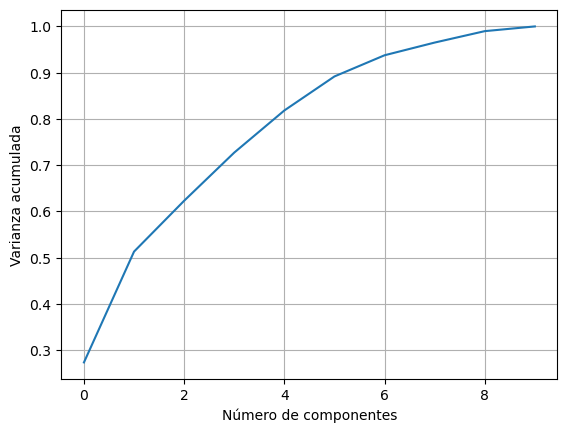

In [10]:
# Se grafica la varianza acumulada en los componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [11]:
print(pd.DataFrame(abs(pca.components_))) 

          0         1         2         3         4         5         6  \
0  0.549343  0.341460  0.150491  0.117465  0.489396  0.441293  0.153442   
1  0.159098  0.055850  0.076581  0.005565  0.135533  0.073277  0.453844   
2  0.015479  0.270363  0.169250  0.585070  0.225149  0.495919  0.147870   
3  0.116159  0.249112  0.789679  0.401542  0.093508  0.124575  0.260397   
4  0.133790  0.525504  0.292144  0.660085  0.167576  0.281993  0.196322   
5  0.057321  0.585072  0.470722  0.039776  0.315515  0.139044  0.306505   
6  0.060758  0.109744  0.044617  0.206281  0.057104  0.113755  0.712110   
7  0.062014  0.060982  0.057275  0.032287  0.031747  0.068922  0.196652   
8  0.303171  0.227278  0.024930  0.038606  0.738158  0.461003  0.043414   
9  0.733855  0.243417  0.080184  0.015805  0.076869  0.457569  0.025773   

          7         8         9  
0  0.140073  0.161600  0.204091  
1  0.524006  0.551721  0.396210  
2  0.186289  0.071546  0.444294  
3  0.041123  0.065694  0.203828  
4  0

In [12]:
CargasComponentes = pd.DataFrame(pca.components_, columns=Hipoteca.columns)
CargasComponentes

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,-0.549343,-0.341460,0.150491,0.117465,-0.489396,-0.441293,0.153442,0.140073,0.161600,-0.204091
1,0.159098,0.055850,-0.076581,0.005565,0.135533,-0.073277,0.453844,0.524006,0.551721,0.396210
2,0.015479,-0.270363,0.169250,0.585070,0.225149,0.495919,0.147870,0.186289,0.071546,-0.444294
3,0.116159,0.249112,0.789679,-0.401542,-0.093508,0.124575,0.260397,-0.041123,0.065694,-0.203828
4,-0.133790,-0.525504,-0.292144,-0.660085,0.167576,0.281993,0.196322,0.002478,0.030011,-0.194513
5,-0.057321,0.585072,-0.470722,-0.039776,-0.315515,0.139044,0.306505,0.079488,-0.008611,-0.460459
6,0.060758,-0.109744,-0.044617,0.206281,0.057104,-0.113755,0.712110,-0.581456,-0.210120,0.184877
7,-0.062014,0.060982,-0.057275,0.032287,0.031747,0.068922,-0.196652,-0.568478,0.780884,-0.103614
8,0.303171,-0.227278,-0.024930,0.038606,-0.738158,0.461003,-0.043414,-0.039218,0.028632,0.304429
9,0.733855,-0.243417,-0.080184,-0.015805,-0.076869,-0.457569,-0.025773,0.016795,0.065805,-0.418296


In [13]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=Hipoteca.columns)
CargasComponentes #Solo analizamos las cargas de los primeros 6. Ubicar cargas mínimas al 50%, y deben ser las más altas
#en una columna. Ej: gastos_otros en 2 y 4. Ubicamos carga máxima en una columna de un componente y verificamos si no hay
# otras cargas de 50% en otros componentes.

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,0.549343,0.341460,0.150491,0.117465,0.489396,0.441293,0.153442,0.140073,0.161600,0.204091
1,0.159098,0.055850,0.076581,0.005565,0.135533,0.073277,0.453844,0.524006,0.551721,0.396210
2,0.015479,0.270363,0.169250,0.585070,0.225149,0.495919,0.147870,0.186289,0.071546,0.444294
3,0.116159,0.249112,0.789679,0.401542,0.093508,0.124575,0.260397,0.041123,0.065694,0.203828
4,0.133790,0.525504,0.292144,0.660085,0.167576,0.281993,0.196322,0.002478,0.030011,0.194513
5,0.057321,0.585072,0.470722,0.039776,0.315515,0.139044,0.306505,0.079488,0.008611,0.460459
6,0.060758,0.109744,0.044617,0.206281,0.057104,0.113755,0.712110,0.581456,0.210120,0.184877
7,0.062014,0.060982,0.057275,0.032287,0.031747,0.068922,0.196652,0.568478,0.780884,0.103614
8,0.303171,0.227278,0.024930,0.038606,0.738158,0.461003,0.043414,0.039218,0.028632,0.304429
9,0.733855,0.243417,0.080184,0.015805,0.076869,0.457569,0.025773,0.016795,0.065805,0.418296


In [14]:
DatosHipotecaACP = Hipoteca.drop(columns=['ahorros', 'vivienda', 'estado_civil', 'comprar'])
DatosHipotecaACP

,ingresos,gastos_comunes,pago_coche,gastos_otros,hijos,trabajo
0,6000,1000,0,600,2,2
1,6745,944,123,429,3,6
2,6455,1033,98,795,1,8
3,7098,1278,15,254,0,3
4,6167,863,223,520,0,3
...,...,...,...,...,...,...
197,3831,690,352,488,0,2
198,3961,1030,270,475,3,8
199,3184,955,276,684,3,8
200,3334,867,369,652,2,5


## **II. Análisis correlacional de datos (ACD)**


 **Evaluación visual**

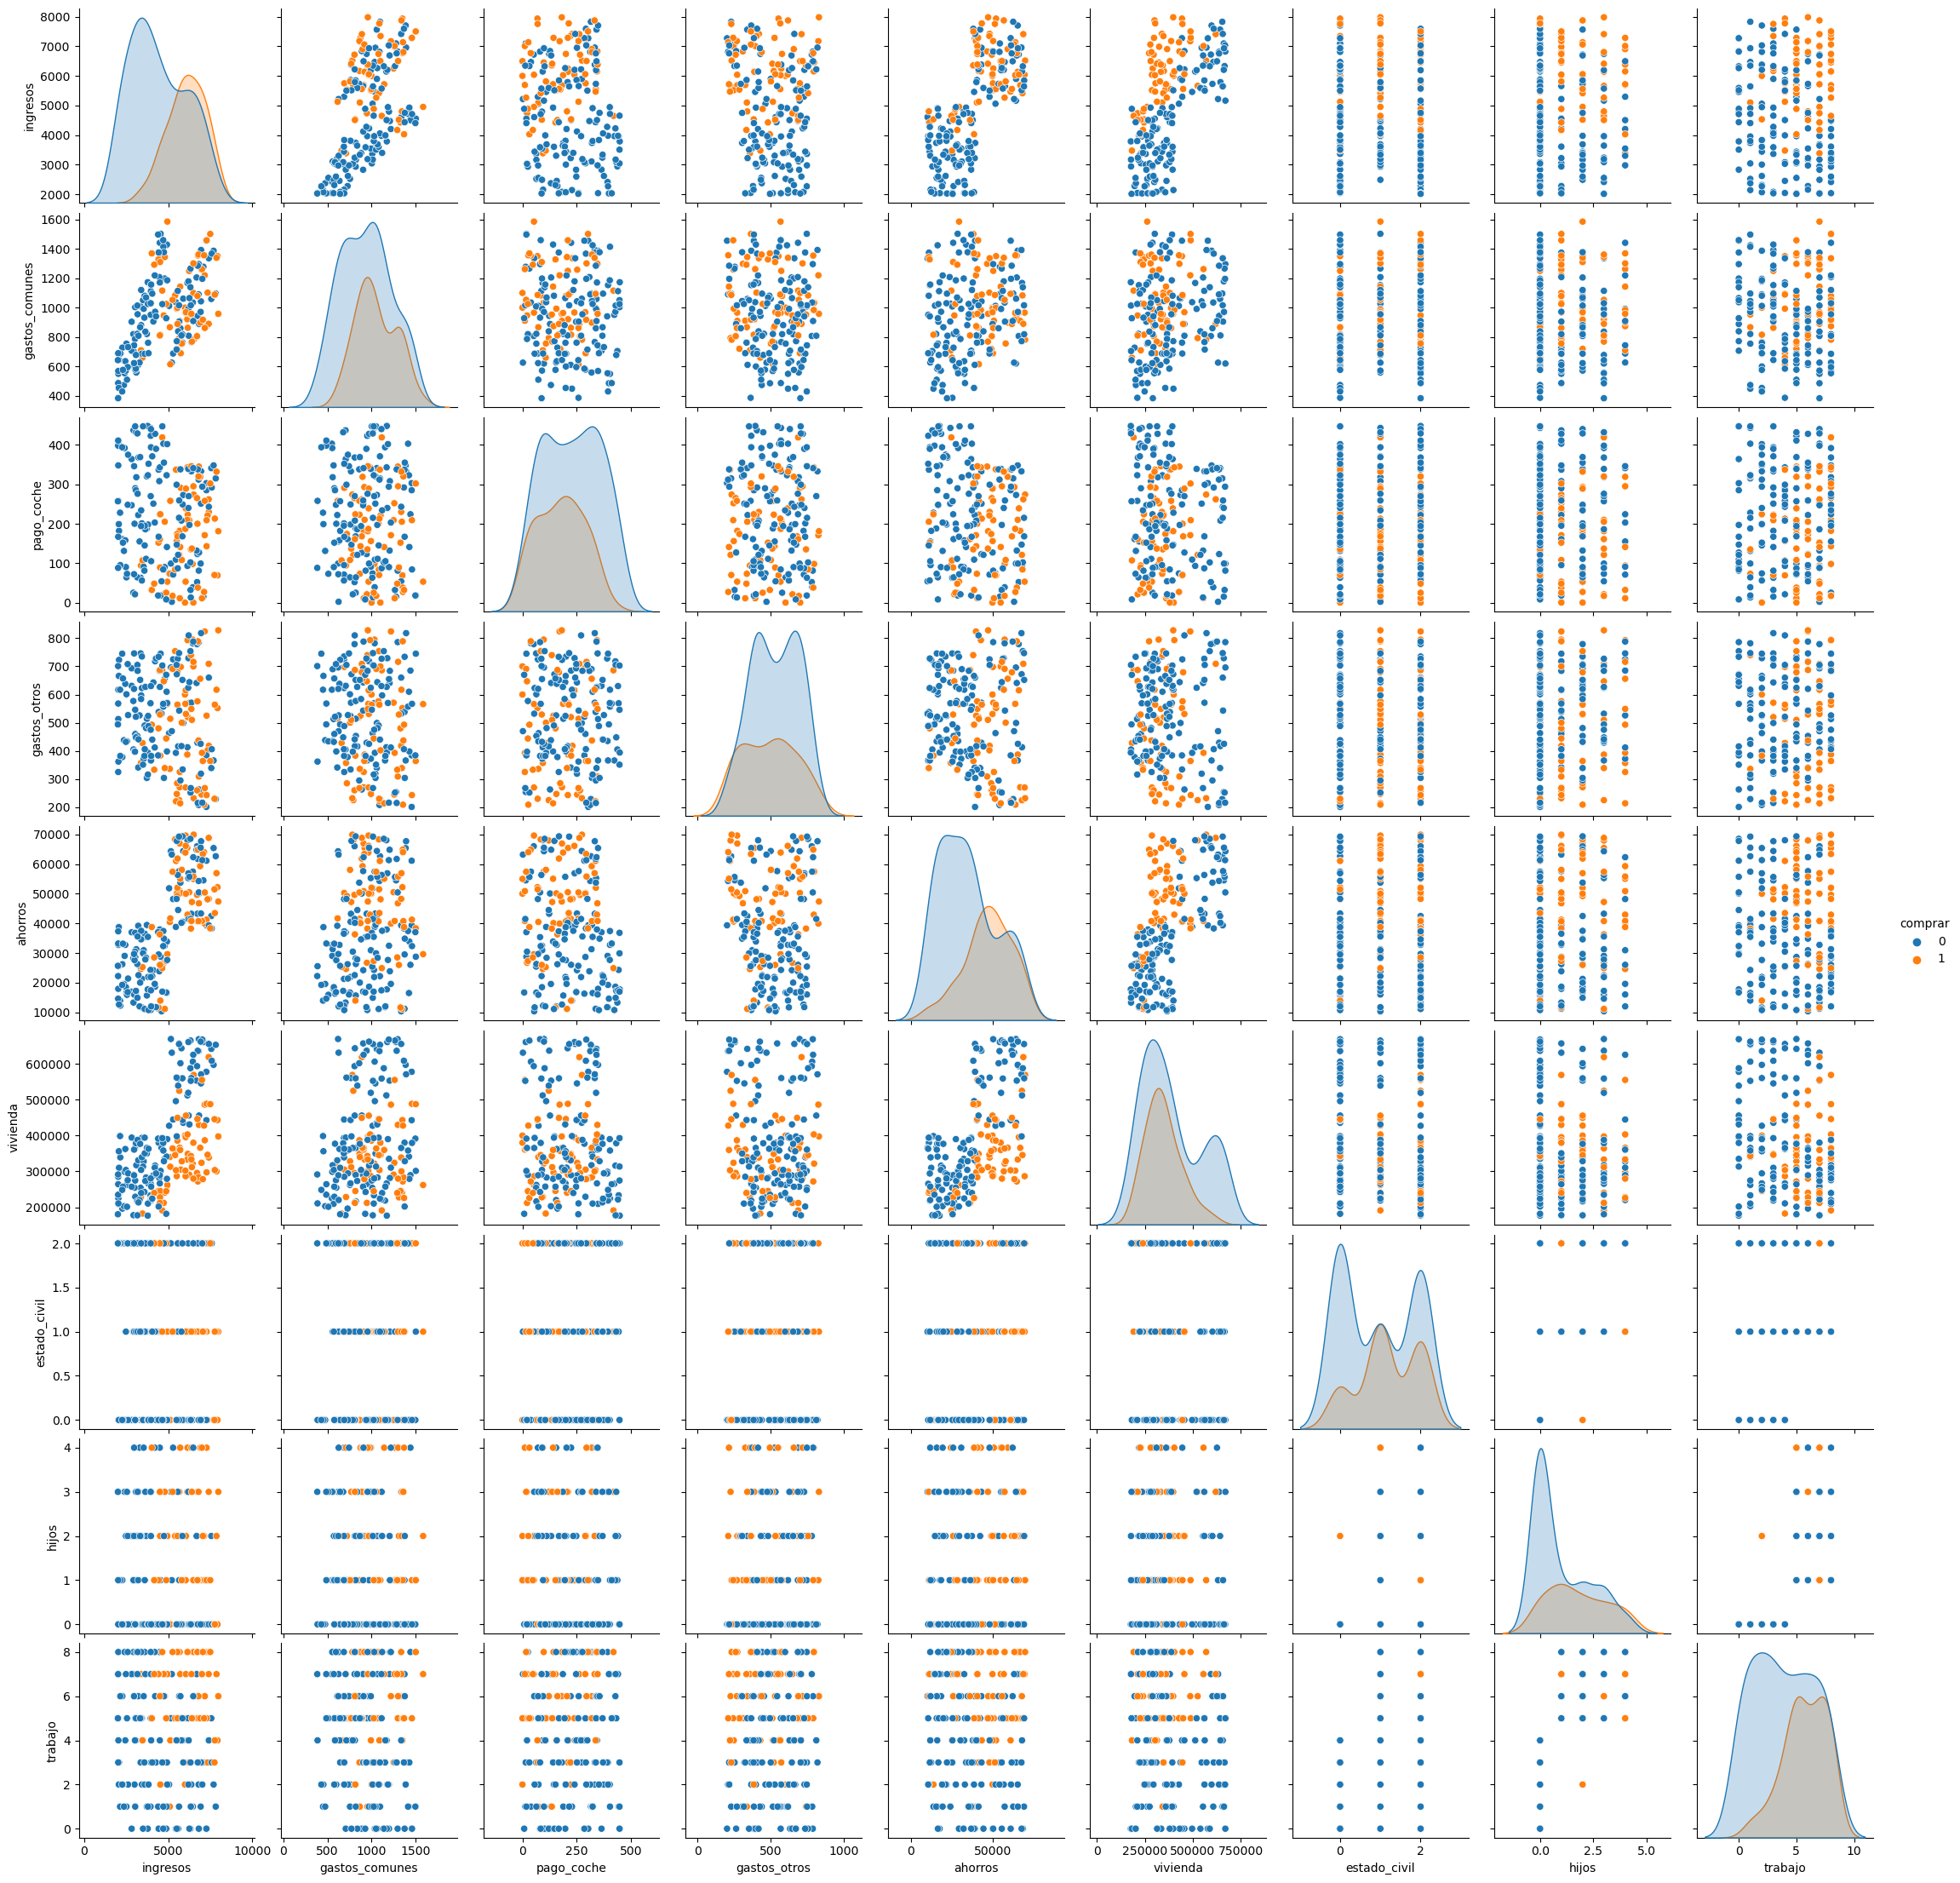

In [15]:
sns.pairplot(Hipoteca, hue='comprar')
plt.show()

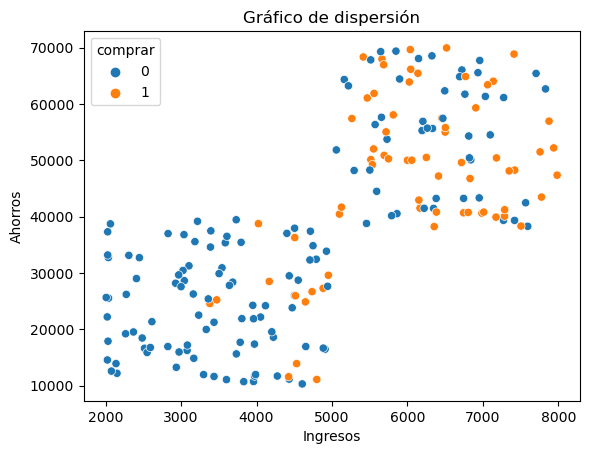

In [16]:
sns.scatterplot(x='ingresos', y ='ahorros', data=Hipoteca, hue='comprar')
plt.title('Gráfico de dispersión')
plt.xlabel('Ingresos')
plt.ylabel('Ahorros')
plt.show()

In [17]:
CorrHipoteca = Hipoteca.corr(method='pearson')
CorrHipoteca

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000


In [18]:
print(CorrHipoteca['ingresos'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

ingresos          1.000000
ahorros           0.712889
vivienda          0.614721
gastos_comunes    0.560211
comprar           0.467123
hijos            -0.024483
trabajo          -0.038852
estado_civil     -0.042556
pago_coche       -0.109780
gastos_otros     -0.124105
Name: ingresos, dtype: float64 



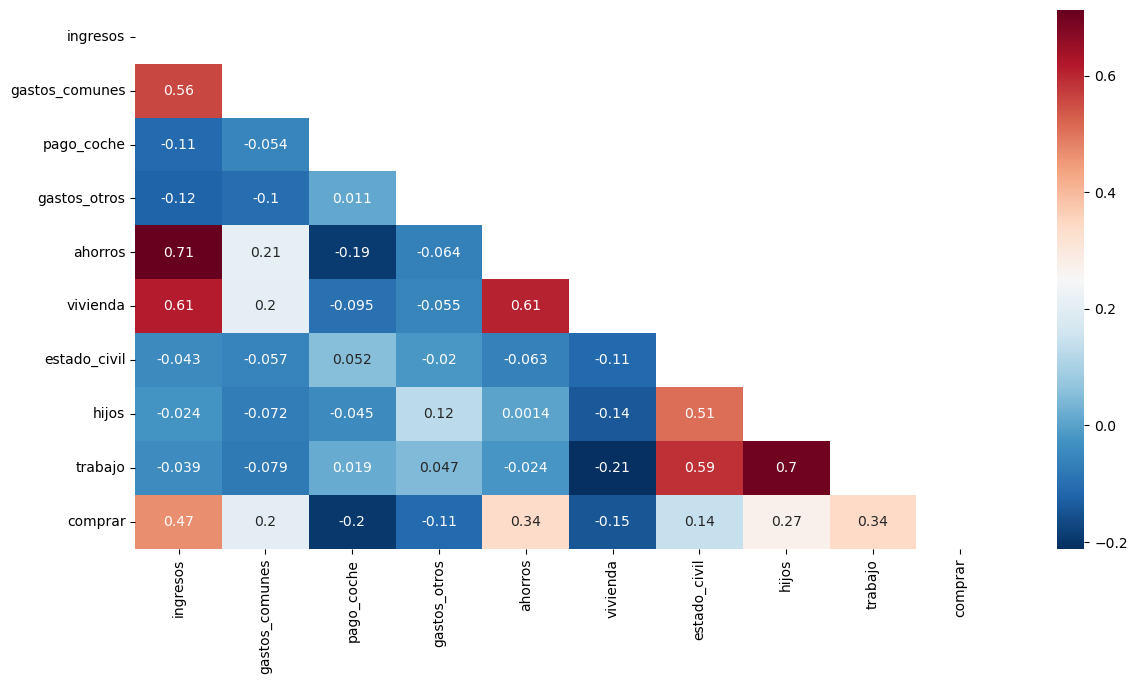

In [19]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrHipoteca)
sns.heatmap(CorrHipoteca, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Selección de variables:**

Se tienen 2 correlaciones altas: 'ingresos' y 'ahorros' (0.71) y 'trabajo' e 'hijos' (0.69). Si el propósito es reducir la dimensionalidad, se pudieran suprimir 'ahorros' e 'hijos'.

In [20]:
DatosHipotecaACD = Hipoteca.drop(columns=['ahorros', 'hijos'])
DatosHipotecaACD

,ingresos,gastos_comunes,pago_coche,gastos_otros,vivienda,estado_civil,trabajo,comprar
0,6000,1000,0,600,400000,0,2,1
1,6745,944,123,429,636897,1,6,0
2,6455,1033,98,795,321779,2,8,1
3,7098,1278,15,254,660933,0,3,0
4,6167,863,223,520,348932,0,3,1
...,...,...,...,...,...,...,...,...
197,3831,690,352,488,363120,0,2,0
198,3961,1030,270,475,280421,2,8,0
199,3184,955,276,684,388025,1,8,0
200,3334,867,369,652,376892,1,5,0
